<a href="https://colab.research.google.com/github/yongjun1994/branchTest/blob/main/15_%ED%98%B8%ED%85%94_%EC%98%88%EC%95%BD_%EC%88%98%EC%9A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 호텔 예약 수요 데이터셋**
[호텔 예약 수요 데이터셋](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)은 일반적으로 호텔 예약에 대한 수요 패턴을 분석하기 위한 데이터셋입니다. 이 데이터셋은 예약 취소, 체크인 날짜, 고객 유형, 체류 기간, 객실 유형, 예약 경로 등 다양한 요소를 포함하며, 주로 예약 트렌드 분석, 고객 행동 예측, 수요 예측 등에 사용됩니다.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# **2. 데이터셋 컬럼 설명**
* hotel: 호텔 유형 (Resort Hotel, City Hotel)
* is_canceled: 예약 취소 여부 (0: 예약 유지, 1: 예약 취소)
* lead_time: 예약과 실제 체크인 사이의 기간(일 단위)
* arrival_date_year: 도착 연도
* arrival_date_month: 도착 월
* arrival_date_week_number: 일년 중 주
* arrival_date_day_of_month: 도착 일
* stays_in_weekend_nights: 주말(토, 일) 동안의 숙박일 수
* stays_in_week_nights: 주중(월~금) 동안의 숙박일 수
* adults: 성인 투숙객 수
* children: 어린이 투숙객 수
* babies: 유아 투숙객 수
* meal: 예약된 식사 유형
* country: 고객의 국가
* market_segment: 예약 시장 세그먼트
* distribution_channel: 예약 채널 (예: 온라인, 오프라인)
* is_repeated_guest: 재방문 여부
* previous_cancellations: 이전 예약 취소 횟수
* reserved_room_type: 예약된 객실 유형
* assigned_room_type: 실제 배정된 객실 유형
* booking_changes: 예약 변경 횟수
* deposit_type: 보증금 유형 (No Deposit, Non Refund, Refundable)
* days_in_waiting_list: 대기자 명단에 있었던 일 수
* customer_type: 고객 유형 (예: Transient, Group)
* adr: 평균 일일 요금 (유로)
* required_car_parking_spaces: 주차 공간 요구 수
* total_of_special_requests: 특별 요청 수
* reservation_status: 예약 상태 (Check-Out, Canceled, No-Show)
* reservation_status_date: 예약 상태가 마지막으로 업데이트된 날짜

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
hotel_df = pd.read_csv('/content/drive/MyDrive/컴퓨터비전 시즌3/3. 데이터분석/Data/hotel_bookings.csv')
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


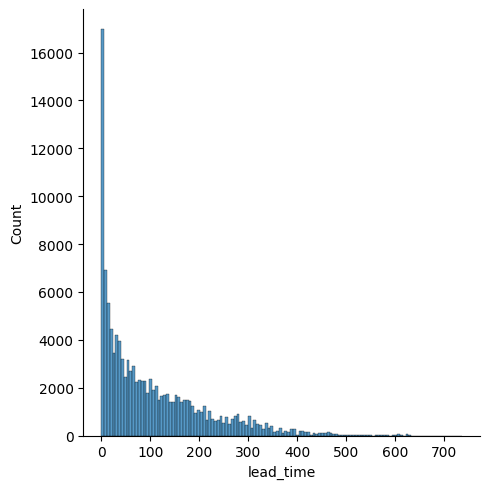

In [ ]:
sns.displot(hotel_df['lead_time'])

<Axes: ylabel='lead_time'>

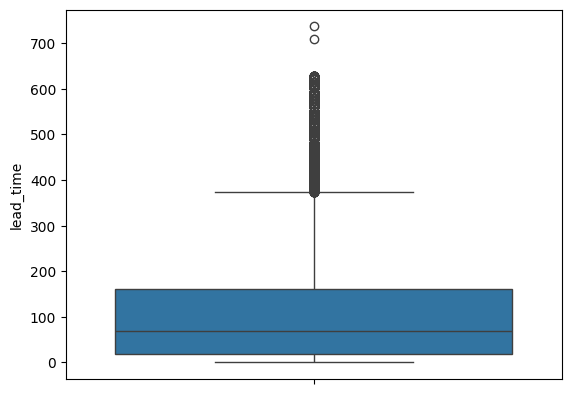

In [ ]:
sns.boxplot(hotel_df['lead_time'])

In [ ]:
Q1 = hotel_df['lead_time'].quantile(0.25)
Q3 = hotel_df['lead_time'].quantile(0.75)
print(Q1)
print(Q3)

18.0
160.0


In [ ]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound)
print(upper_bound)

-195.0
373.0


In [ ]:
hotel_df = hotel_df[(hotel_df['lead_time'] >= lower_bound) & (hotel_df['lead_time'] <= upper_bound)]
len(hotel_df) # 119390

116385

<Axes: ylabel='lead_time'>

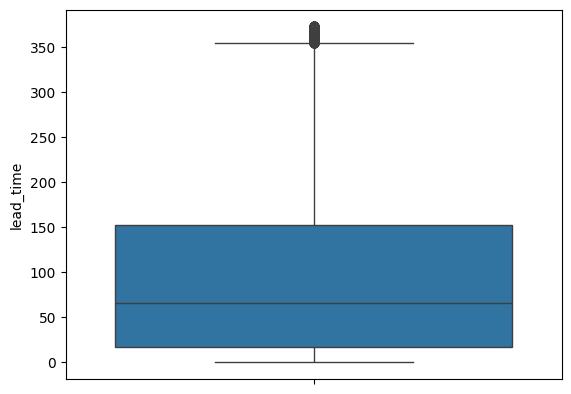

In [ ]:
sns.boxplot(hotel_df['lead_time'])

<Axes: xlabel='distribution_channel', ylabel='is_canceled'>

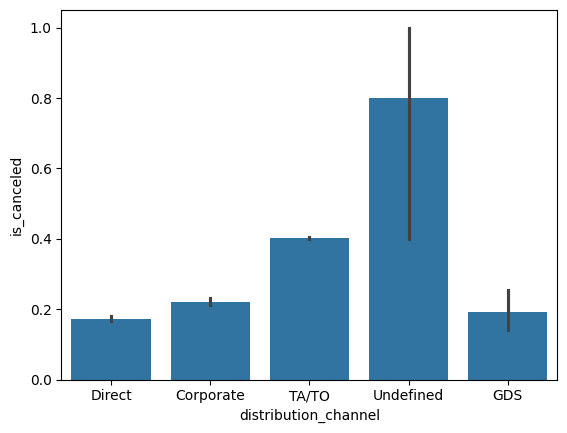

In [ ]:
sns.barplot(x=hotel_df['distribution_channel'], y=hotel_df['is_canceled'])

In [ ]:
hotel_df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,94968
Direct,14619
Corporate,6600
GDS,193
Undefined,5


<Axes: xlabel='hotel', ylabel='is_canceled'>

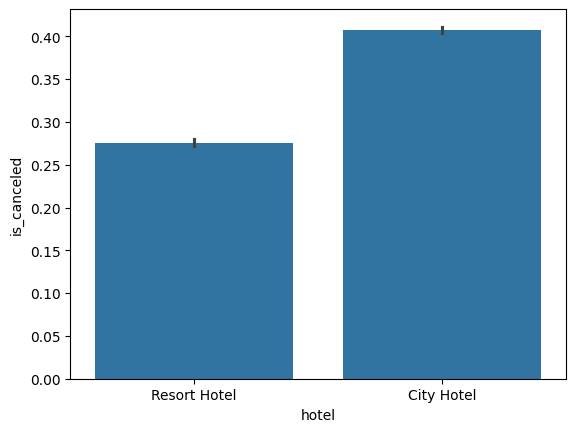

In [ ]:
sns.barplot(x=hotel_df['hotel'], y=hotel_df['is_canceled'])

In [ ]:
hotel_df['hotel'].value_counts()

,count
hotel,
City Hotel,76754
Resort Hotel,39631


<Axes: xlabel='arrival_date_month', ylabel='is_canceled'>

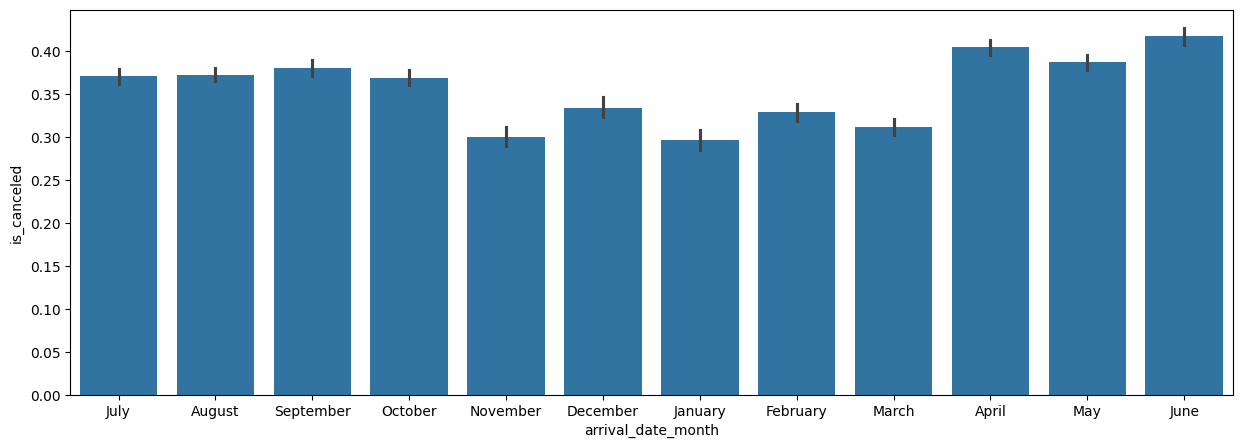

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x=hotel_df['arrival_date_month'], y=hotel_df['is_canceled'])

In [ ]:
import calendar

In [ ]:
print(calendar.month_name[1])
print(calendar.month_name[2])
print(calendar.month_name[3])

January
February
March


In [ ]:
months = []
for i in range(1, 13):
    months.append(calendar.month_name[i])

In [ ]:
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

<Axes: xlabel='arrival_date_month', ylabel='is_canceled'>

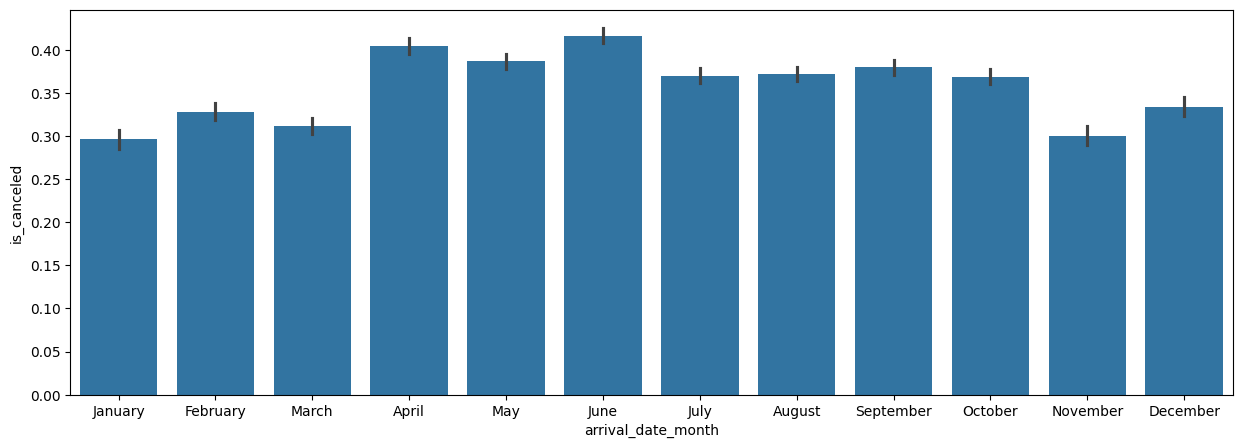

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x=hotel_df['arrival_date_month'], y=hotel_df['is_canceled'], order=months)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116385 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           116385 non-null  object 
 1   is_canceled                     116385 non-null  int64  
 2   lead_time                       116385 non-null  int64  
 3   arrival_date_year               116385 non-null  int64  
 4   arrival_date_month              116385 non-null  object 
 5   arrival_date_week_number        116385 non-null  int64  
 6   arrival_date_day_of_month       116385 non-null  int64  
 7   stays_in_weekend_nights         116385 non-null  int64  
 8   stays_in_week_nights            116385 non-null  int64  
 9   adults                          116385 non-null  int64  
 10  children                        116381 non-null  float64
 11  babies                          116385 non-null  int64  
 12  meal                 

In [ ]:
hotel_df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
hotel_df['children'].value_counts(dropna=False)

,count
children,
0.0,107798
1.0,4856
2.0,3650
3.0,76
NaN,4
10.0,1


In [ ]:
hotel_df['children'] = hotel_df['children'].fillna(0)

<ipython-input-28-c7c9f0491e27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['children'] = hotel_df['children'].fillna(0)


In [ ]:
hotel_df[hotel_df['adults'] == 0] # 401

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,...,No Deposit,9.0,NaN,0,Transient,98.85,0,1,Check-Out,2017-07-31
117274,City Hotel,0,276,2017,July,31,30,2,1,0,...,No Deposit,9.0,NaN,0,Transient,93.64,0,2,Check-Out,2017-08-02
117303,City Hotel,0,291,2017,July,30,29,2,2,0,...,No Deposit,9.0,NaN,0,Transient,98.85,0,1,Check-Out,2017-08-02
117453,City Hotel,0,159,2017,July,31,31,1,3,0,...,No Deposit,9.0,NaN,0,Transient,121.88,0,1,Check-Out,2017-08-04


In [ ]:
# people 파생변수
hotel_df['people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']
hotel_df.head()

<ipython-input-30-f9d953c1cdb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [ ]:
hotel_df[hotel_df['people'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0


In [ ]:
# hotel_df = hotel_df[hotel_df['people'] != 0]
hotel_df.drop(hotel_df[hotel_df['people'] == 0].index, inplace=True)

<ipython-input-32-723e9f3e8c87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(hotel_df[hotel_df['people'] == 0].index, inplace=True)


In [ ]:
hotel_df[hotel_df['people'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people


In [ ]:
hotel_df.drop(['adults', 'children', 'babies'], axis=1, inplace=True)

<ipython-input-34-f9dffa2f4f78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['adults', 'children', 'babies'], axis=1, inplace=True)


In [ ]:
hotel_df['total_nights'] = hotel_df['stays_in_week_nights'] + hotel_df['stays_in_weekend_nights']
hotel_df.head()

<ipython-input-35-7baafaaa2af0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['total_nights'] = hotel_df['stays_in_week_nights'] + hotel_df['stays_in_weekend_nights']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [ ]:
hotel_df.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1, inplace=True)

<ipython-input-36-b1c069c5ab91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1, inplace=True)


In [ ]:
# season 파생변수
# arrival_date_month에 따라 아래와 같이 저장
# 12, 1, 2: winter
# 3, 4, 5: spring
# 6, 7, 8: summer
# 9, 10, 11: fall
season_dic = {'spring':[3, 4, 5], 'summer':[6, 7, 8], 'fall':[9, 10, 11], 'winter':[12, 1, 2]}

In [ ]:
new_season_dic = {}

In [ ]:
for i in season_dic:
    for j in season_dic[i]:
        new_season_dic[calendar.month_name[j]] = i

In [ ]:
new_season_dic

{'March': 'spring',
 'April': 'spring',
 'May': 'spring',
 'June': 'summer',
 'July': 'summer',
 'August': 'summer',
 'September': 'fall',
 'October': 'fall',
 'November': 'fall',
 'December': 'winter',
 'January': 'winter',
 'February': 'winter'}

In [ ]:
hotel_df['season'] = hotel_df['arrival_date_month'].map(new_season_dic)
hotel_df.head()

<ipython-input-41-9c7229666310>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['season'] = hotel_df['arrival_date_month'].map(new_season_dic)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer
5,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer


In [ ]:
hotel_df.drop(['arrival_date_month'], axis=1, inplace=True)

<ipython-input-42-635f7152cd24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['arrival_date_month'], axis=1, inplace=True)


In [ ]:
hotel_df['expected_room_type'] = (hotel_df['reserved_room_type'] == hotel_df['assigned_room_type']).astype(int)
hotel_df.head()

<ipython-input-43-ba417ea73ffe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['expected_room_type'] = (hotel_df['reserved_room_type'] == hotel_df['assigned_room_type']).astype(int)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season,expected_room_type
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer,1
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,0
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,1
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1


In [ ]:
hotel_df.drop(['reserved_room_type', 'assigned_room_type'], axis=1, inplace=True)

<ipython-input-44-006314302c2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['reserved_room_type', 'assigned_room_type'], axis=1, inplace=True)


In [ ]:
hotel_df['cancel_rate'] = hotel_df['previous_cancellations'] / (hotel_df['previous_cancellations'] + hotel_df['previous_bookings_not_canceled'])
hotel_df.head()

<ipython-input-45-66990366192d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['cancel_rate'] = hotel_df['previous_cancellations'] / (hotel_df['previous_cancellations'] + hotel_df['previous_bookings_not_canceled'])


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season,expected_room_type,cancel_rate
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer,1,NaN
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,0,NaN
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,1,NaN
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1,NaN
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1,NaN


In [ ]:
hotel_df[hotel_df['cancel_rate'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season,expected_room_type,cancel_rate
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,0.00,0,0,Check-Out,2015-07-01,2.0,0,summer,1,NaN
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,75.00,0,0,Check-Out,2015-07-02,1.0,1,summer,0,NaN
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,75.00,0,0,Check-Out,2015-07-02,1.0,1,summer,1,NaN
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.00,0,1,Check-Out,2015-07-03,2.0,2,summer,1,NaN
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.00,0,1,Check-Out,2015-07-03,2.0,2,summer,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,35,30,BB,BEL,Offline TA/TO,TA/TO,...,96.14,0,0,Check-Out,2017-09-06,2.0,7,summer,1,NaN
119386,City Hotel,0,102,2017,35,31,BB,FRA,Online TA,TA/TO,...,225.43,0,2,Check-Out,2017-09-07,3.0,7,summer,1,NaN
119387,City Hotel,0,34,2017,35,31,BB,DEU,Online TA,TA/TO,...,157.71,0,4,Check-Out,2017-09-07,2.0,7,summer,1,NaN
119388,City Hotel,0,109,2017,35,31,BB,GBR,Online TA,TA/TO,...,104.40,0,0,Check-Out,2017-09-07,2.0,7,summer,1,NaN


In [ ]:
hotel_df['cancel_rate'] = hotel_df['cancel_rate'].fillna(-1)

<ipython-input-47-599e806aa6a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['cancel_rate'] = hotel_df['cancel_rate'].fillna(-1)


In [ ]:
hotel_df.drop(['previous_cancellations', 'previous_bookings_not_canceled'], axis=1, inplace=True)

<ipython-input-48-73aa7b22e2dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['previous_cancellations', 'previous_bookings_not_canceled'], axis=1, inplace=True)


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116206 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        116206 non-null  object 
 1   is_canceled                  116206 non-null  int64  
 2   lead_time                    116206 non-null  int64  
 3   arrival_date_year            116206 non-null  int64  
 4   arrival_date_week_number     116206 non-null  int64  
 5   arrival_date_day_of_month    116206 non-null  int64  
 6   meal                         116206 non-null  object 
 7   country                      115728 non-null  object 
 8   market_segment               116206 non-null  object 
 9   distribution_channel         116206 non-null  object 
 10  is_repeated_guest            116206 non-null  int64  
 11  booking_changes              116206 non-null  int64  
 12  deposit_type                 116206 non-null  object 
 13  agen

In [ ]:
hotel_df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
meal,0
country,478
market_segment,0
distribution_channel,0


In [ ]:
hotel_df['agent'].value_counts(dropna=False).sort_index()

,count
agent,
1.0,5907
2.0,159
3.0,1294
4.0,47
5.0,330
...,...
526.0,10
527.0,35
531.0,68


In [ ]:
hotel_df['agent'] = hotel_df['agent'].fillna(-1)

<ipython-input-52-d9838ad3419d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['agent'] = hotel_df['agent'].fillna(-1)


In [ ]:
hotel_df['company'].value_counts(dropna=False).sort_index()

,count
company,
6.0,1
8.0,1
9.0,37
10.0,1
11.0,1
...,...
534.0,2
539.0,2
541.0,1


In [ ]:
hotel_df['company'] = hotel_df['company'].fillna(-1)

<ipython-input-54-f6b26db59211>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['company'] = hotel_df['company'].fillna(-1)


In [ ]:
hotel_df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
meal,0
country,478
market_segment,0
distribution_channel,0


In [ ]:
hotel_df.select_dtypes(exclude=['number']).columns.tolist()

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'season']

In [ ]:
for i in hotel_df.select_dtypes(exclude=['number']).columns.tolist():
    print(i, hotel_df[i].nunique())

hotel 2
meal 5
country 177
market_segment 8
distribution_channel 5
deposit_type 3
customer_type 4
reservation_status 3
reservation_status_date 926
season 4


In [ ]:
hotel_df.drop(['meal', 'country', 'reservation_status_date'], axis=1, inplace=True)

<ipython-input-58-0f634fb7c9b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['meal', 'country', 'reservation_status_date'], axis=1, inplace=True)


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116206 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        116206 non-null  object 
 1   is_canceled                  116206 non-null  int64  
 2   lead_time                    116206 non-null  int64  
 3   arrival_date_year            116206 non-null  int64  
 4   arrival_date_week_number     116206 non-null  int64  
 5   arrival_date_day_of_month    116206 non-null  int64  
 6   market_segment               116206 non-null  object 
 7   distribution_channel         116206 non-null  object 
 8   is_repeated_guest            116206 non-null  int64  
 9   booking_changes              116206 non-null  int64  
 10  deposit_type                 116206 non-null  object 
 11  agent                        116206 non-null  float64
 12  company                      116206 non-null  float64
 13  days

In [ ]:
hotel_df = pd.get_dummies(hotel_df, columns=['hotel', 'market_segment', 'distribution_channel',
                                             'deposit_type', 'customer_type', 'reservation_status',
                                             'season'], drop_first=True)
hotel_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,season_spring,season_summer,season_winter
0,0,342,2015,27,1,0,3,-1.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
2,0,7,2015,27,1,0,0,-1.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
3,0,13,2015,27,1,0,0,304.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
4,0,14,2015,27,1,0,0,240.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
5,0,14,2015,27,1,0,0,240.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116206 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     116206 non-null  int64  
 1   lead_time                       116206 non-null  int64  
 2   arrival_date_year               116206 non-null  int64  
 3   arrival_date_week_number        116206 non-null  int64  
 4   arrival_date_day_of_month       116206 non-null  int64  
 5   is_repeated_guest               116206 non-null  int64  
 6   booking_changes                 116206 non-null  int64  
 7   agent                           116206 non-null  float64
 8   company                         116206 non-null  float64
 9   days_in_waiting_list            116206 non-null  int64  
 10  adr                             116206 non-null  float64
 11  required_car_parking_spaces     116206 non-null  int64  
 12  total_of_special_requ

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hotel_df.drop('is_canceled', axis=1),
                                                    hotel_df['is_canceled'], test_size=0.3,
                                                    random_state=2025)

In [ ]:
X_train.shape, X_test.shape

((81344, 38), (34862, 38))

In [ ]:
y_train.shape, y_test.shape

((81344,), (34862,))

# **3. LogisticRegression**
사이킷런의 LogisticRegression은 이진 분류(Binary Classification)와 다중 분류(Multiclass Classification) 문제를 해결하기 위한 머신러닝 알고리즘입니다. 로지스틱 회귀는 선형 모델로, 입력 데이터에 대한 선형 결합을 통해 확률을 예측하고, 이 확률을 로지스틱 함수(시그모이드 함수)를 사용해 이진 또는 다중 클래스에 대한 예측을 수행합니다. 사이킷런의 LogisticRegression은 과적합을 방지하기 위한 규제(Regularization) 기법(penalty)을 지원합니다. 또한, 반복 최적화의 최대 횟수를 max_iter로 설정할 수 있으며, 모델의 성능 평가는 정확도, ROC-AUC 등 다양한 지표를 통해 수행할 수 있습니다. 이 모델은 특히 해석 가능성이 높고, 계산이 효율적이며, 선형적으로 구분 가능한 데이터셋에서 뛰어난 성능을 발휘합니다.

### 규제
규제(Regularization)는 머신러닝 모델이 과적합(Overfitting) 되는 것을 방지하기 위해 사용되는 기법입니다. 과적합은 모델이 학습 데이터에 지나치게 맞춰져서, 새로운 데이터(테스트 데이터)에는 제대로 일반화하지 못하는 현상입니다.
규제는 모델의 복잡도를 줄이고, 불필요한 가중치(Weights)를 작게 만들어 과적합을 방지합니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fz6Pg7%2FbtsLG8rCPfL%2FS7jwmND15UgTaexmpvIDfk%2Fimg.png'>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* 반복 횟수가 부족하면 ConvergenceWarning 경고가 나타날 수 있습니다.
* 이는 알고리즘이 최적해를 찾지 못했다는 의미입니다.
* max_iter=1000: 최대 1000번 반복하여 최적의 가중치를 찾습니다.
* 기본값: max_iter=100

In [ ]:
from sklearn.preprocessing import StandardScaler

### 데이터 스케일링
데이터 스케일링은 서로 다른 범위와 단위를 가진 데이터를 일정한 범위로 변환하여 모델 학습을 더 효율적으로 수행할 수 있도록 만드는 전처리 과정입니다. 주로 변수 간의 값의 크기 차이가 클 때 발생하는 불균형을 해결하기 위해 사용되며, 대표적인 방법으로 표준화(Standardization)와 정규화(Normalization)가 있습니다. 스케일링을 통해 학습 속도를 높이고, 기울기 소실(Gradient Vanishing) 문제를 완화하며, 특정 변수에 모델이 과도하게 의존하는 것을 방지할 수 있습니다.

### 표준화
표준화(Standardization)는 데이터의 평균을 0으로, 표준편차를 1로 변환하여 모든 변수가 동일한 척도를 갖도록 만드는 데이터 전처리 기법입니다. 주로 데이터의 분포가 정규 분포를 따를 때 효과적이며, 값의 크기나 단위가 서로 다른 변수를 비교하거나 머신러닝 알고리즘(예: 로지스틱 회귀, SVM)에서 최적의 성능을 내기 위해 사용됩니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F3AzfL%2FbtsLHBtLePz%2F0cbFUJzvdbFdInX8WS9Rf1%2Fimg.png'>

### 정규화
정규화(Normalization)는 데이터의 값을 특정 범위(주로 0과 1 사이)로 변환하여 변수 간의 스케일 차이를 줄이는 데이터 전처리 기법입니다. 이는 주로 최소값과 최대값을 사용해 데이터를 조정하며, 대표적인 방법으로 Min-Max Scaling이 있습니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FsVgCb%2FbtsLHrqWLor%2FP2Iu8JKqjKnJvyJj7uKOyK%2Fimg.png'>

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train)

In [ ]:
x_scaled

array([[-0.59709019, -1.62160316,  0.43706357, ..., -0.61928911,
         1.48668399, -0.46273728],
       [ 2.0753695 , -1.62160316,  1.09680611, ..., -0.61928911,
        -0.6726379 , -0.46273728],
       [-0.29413929, -1.62160316,  0.5103683 , ..., -0.61928911,
         1.48668399, -0.46273728],
       ...,
       [-0.29413929, -1.62160316,  0.65697775, ..., -0.61928911,
         1.48668399, -0.46273728],
       [ 1.64258251, -0.21160992,  1.24341557, ..., -0.61928911,
        -0.6726379 , -0.46273728],
       [-0.77020499, -0.21160992, -0.14937424, ..., -0.61928911,
         1.48668399, -0.46273728]])

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, pred)

0.9293786931329241

In [ ]:
hotel_df['is_canceled'].value_counts()

,count
is_canceled,
0,74010
1,42196


# **5. 혼돈 행렬**
혼돈 행렬(Confusion Matrix)은 분류 모델의 성능을 평가하기 위해 사용되는 도구로, 예측 결과와 실제 레이블 간의 관계를 요약하여 나타낸 행렬입니다. 이 행렬은 이진 분류 문제에서 네 가지 값으로 구성됩니다. True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN). TP와 TN은 모델이 올바르게 예측한 경우를 나타내며, FP와 FN은 모델이 잘못 예측한 경우를 나타냅니다. 이를 통해 분류 모델의 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1 점수와 같은 다양한 성능 지표를 계산할 수 있습니다. 혼돈 행렬은 특히 클래스 간 불균형이 있는 데이터에서 모델의 예측 성능을 구체적으로 분석할 때 유용합니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdigySn%2FbtsLHvtHLPD%2FgXHbQf5686AvoGwkvIHo0K%2Fimg.png'>

* True Positive (TP)
    * 실제값이 양성이고, 모델도 양성으로 올바르게 예측한 경우
    * 예: 실제로 스팸 메일이고, 모델이 스팸 메일로 예측
* True Negative (TN)
    * 실제값이 음성이고, 모델도 음성으로 올바르게 예측한 경우
    * 예: 실제로 정상 메일이고, 모델이 정상 메일로 예측
* False Positive (FP)
    * 실제값은 음성이지만, 모델이 양성으로 잘못 예측한 경우
    * 예: 정상 메일을 스팸으로 잘못 예측
* False Negative (FN)
    * 실제값은 양성이지만, 모델이 음성으로 잘못 예측한 경우
    * 예: 스팸 메일을 정상 메일로 잘못 예측

In [ ]:
confusion_matrix(y_test, pred)

array([[21459,   758],
       [ 1704, 10941]])

### 혼돈 행렬로 계산할 수 있는 지표

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FneyKY%2FbtsLIEJZHdq%2FBrYinc8tK5nD3KkWF2bCm0%2Fimg.png'>

### 조화평균
* 평균의 한 종류로 값들의 역수의 평균을 계산한 뒤 그 액수를 취한 값
* 주로 비율, 속도처럼 두 값이 서로 관계를 맺고 있을 때, 적절한 평균을 구하기 위해 사용

### 문제
* 두 사람이 10km를 걸어서 갔습니다.
* 첫 번째 사람은 5km/h로 5km를 갔습니다.
* 두 번째 사람은 10km/h로 5km를 갔습니다.
* 평균 속도는?

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(f1_score(y_test, pred))

0.9352081374476451
0.8652431791221826
0.8988662504107788


In [ ]:
model.coef_

array([[ 1.94847603e-01,  1.94552577e-02,  2.70391164e-02,
         5.01616243e-03, -1.65181900e-01, -8.07286111e-02,
         3.15638011e-02, -4.47790553e-02,  2.53270856e-03,
         9.15528243e-02, -2.49190422e-01, -2.11042797e-01,
         5.83988434e-02,  4.12663613e-02,  2.16338544e-01,
         4.13389053e-01, -1.10477353e-02,  2.19758541e-03,
        -3.82210698e-02, -3.38984731e-02,  5.50670954e-02,
        -7.92016045e-02,  6.52875420e-02,  7.07365117e-03,
        -3.29141526e-02, -1.89240371e-02,  2.99125122e-02,
         8.87889782e-03,  7.72042982e-01,  7.55275009e-04,
        -2.13722622e-02,  1.09199991e-01, -4.49981015e-02,
        -8.10893703e+00,  2.66824185e-01, -2.72870772e-02,
         1.25430931e-02, -4.54014587e-03]])

In [ ]:
model.intercept_ # 절편

array([-2.32638775])

In [ ]:
proba = lr.predict_proba(X_test)
proba

array([[0.03802158, 0.96197842],
       [0.63404974, 0.36595026],
       [0.97801328, 0.02198672],
       ...,
       [0.94531688, 0.05468312],
       [0.11721987, 0.88278013],
       [0.9862966 , 0.0137034 ]])

In [ ]:
proba = lr.predict_proba(X_test)[:, 1]
proba

array([0.96197842, 0.36595026, 0.02198672, ..., 0.05468312, 0.88278013,
       0.0137034 ])

In [ ]:
# 임계값 설정
threshold = 0.5
pred = (proba >= threshold).astype(int)
pred

array([1, 0, 0, ..., 0, 1, 0])

# 5. 분류 문제에서의 랜덤 포레스트
랜덤 포레스트는 결정 트리(Decision Trees)를 여러 개 만들어서 결합(앙상블)하여 예측 성능을 향상시키는 앙상블 학습(Ensemble Learning) 기법입니다. 분류 문제에서 랜덤 포레스트는 각 트리의 예측값을 모아서 다수결(Majority Voting)을 통해 최종 클래스를 결정합니다.

* 각 트리의 노드 분할(Split) 단계에서, 전체 특성이 아닌 무작위로 선택된 일부 특성만을 사용합니다.
* 이를 통해 트리 간의 상관관계를 줄이고, 과적합을 방지합니다.
* 각 트리에 들어가는 데이터의 개수는 원본 데이터셋 크기와 동일합니다.
* 그러나 중복을 허용하여 샘플링하므로, 일부 데이터는 여러 번 샘플링되고, 일부 데이터는 선택되지 않을 수 있습니다.
* 부트스트래핑된 데이터와 랜덤하게 선택된 특성을 사용하여 결정 트리를 학습합니다.
* 사이킷런(Sklearn)에서 랜덤 포레스트의 기본 트리 개수는 100개입니다.
* 다수결(Majority Voting): 분류 문제에서 가장 많이 예측된 클래스를 선택합니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hotel_df.drop('is_canceled', axis=1), hotel_df['is_canceled'], test_size=0.3, random_state=2025)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=2025)
rf.fit(X_train, y_train)
pred1 = rf.predict(X_test) # 예측
pred1

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
proba = rf.predict_proba(X_test)
proba

array([[0.  , 1.  ],
       [0.02, 0.98],
       [0.96, 0.04],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [ ]:
proba[:, 1]

array([1.  , 0.98, 0.04, ..., 0.  , 0.01, 0.  ])

In [ ]:
accuracy_score(y_test, pred)

0.9293786931329241

In [ ]:
confusion_matrix(y_test, pred)

array([[21459,   758],
       [ 1704, 10941]])

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     22217
           1       0.94      0.87      0.90     12645

    accuracy                           0.93     34862
   macro avg       0.93      0.92      0.92     34862
weighted avg       0.93      0.93      0.93     34862



### ROC AUC Score
ROC AUC Score(Receiver Operating Characteristic - Area Under the Curve)는 이진 분류 모델의 성능을 평가하는 지표로, 분류기의 예측 능력을 직관적으로 나타냅니다. ROC 곡선은 FPR(거짓 양성 비율)과 TPR(참 양성 비율)을 축으로 하여 다양한 임계값에서 모델의 성능을 시각화한 곡선입니다. AUC(Area Under the Curve)는 이 곡선 아래의 면적을 나타내며, 값이 1에 가까울수록 완벽한 분류 성능을 의미하고, 0.5에 가까울수록 랜덤 추측에 가까운 성능을 나타냅니다. 따라서 ROC AUC Score는 모델의 분류 성능이 얼마나 좋은지를 평가하는 데 중요한 역할을 합니다.

### ROC Curve
ROC 곡선은 이진 분류 모델의 성능을 평가하기 위해 사용하는 곡선으로, 모델의 민감도(참 양성 비율, TPR)와 특이도(참 음성 비율, TNR)의 반대인 거짓 양성 비율(FPR)의 관계를 시각화한 그래프입니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F2bzfH%2FbtsLInILRor%2FfNjvHSN3sq12PY0LOzUEP1%2Fimg.png'>

### AUC
* AUC는 ROC 곡선 아래의 면적을 나타내며, 이진 분류기의 성능을 하나의 숫자로 나타내는 지표입니다.
* AUC는 다음을 의미합니다
    * AUC = 1: 완벽한 분류기
    * AUC = 0.5: 랜덤 추측 수준
    * AUC < 0.5: 모델 성능이 무작위 추측보다 나쁨
* 수학적으로 AUC는 양성 클래스와 음성 클래스의 예측 점수를 비교해 양성 클래스가 더 높은 점수를 받을 확률을 나타냅니다.

In [ ]:
roc_auc_score(y_test, proba[:, 1])

1.0

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.80042310e-04
 2.70063465e-04 3.15074042e-04 4.95116352e-04 7.20169240e-04
 1.71040194e-03 3.91592024e-03 1.21078453e-02 4.48305352e-02
 1.86028717e-01 1.00000000e+00] [0.         0.78774219 0.89877422 0.94116251 0.9658363  0.9785686
 0.98750494 0.99319889 0.99580862 0.99707394 0.99778569 0.99889284
 0.99968367 0.99984183 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ] [ inf 1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88
 0.86 0.12 0.1  0.09 0.07 0.06 0.05 0.04 0.03 0.02 0.01 0.  ]


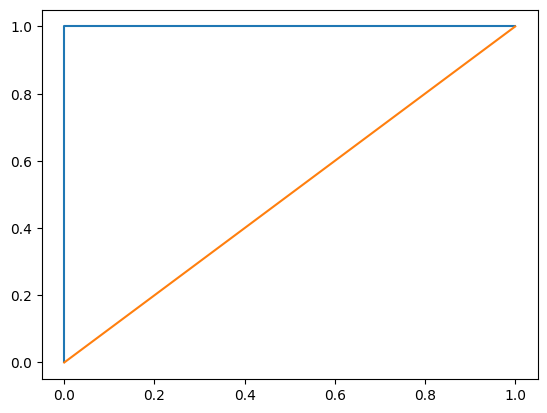

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics._plot.roc_curve import roc_curve

fpr, tpr, thr = roc_curve(y_test, proba[:, 1])
print(fpr, tpr, thr)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1])
plt.show()

# 6. 교차 검증
교차 검증 (Cross Validation)은 모델의 성능을 더 정확히 평가하기 위해 데이터를 반복적으로 학습용 데이터와 검증용 데이터로 나누어 사용하는 기법입니다. 가장 일반적인 방식인 k-겹 교차 검증(k-fold Cross Validation)은 데이터를 k개의 동일한 크기로 나누고, 각 부분을 한 번씩 검증 데이터로 사용하며 나머지 부분을 학습 데이터로 사용하여 모델을 훈련하고 평가합니다. 이를 통해 데이터 분할에 따른 편향을 줄이고, 모델의 일반화 성능(새로운 데이터에 대한 예측 능력)을 신뢰성 있게 측정할 수 있습니다. 크로스 밸리데이션은 특히 데이터셋이 작거나 편향된 경우에 유용하며, 과적합(overfitting)을 방지하는 데 도움을 줍니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcSllTG%2FbtsLIeMnXeU%2FsaawXDk8FROerkCs1tet6K%2Fimg.png'>

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
hotel_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,season_spring,season_summer,season_winter
0,0,342,2015,27,1,0,3,-1.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
2,0,7,2015,27,1,0,0,-1.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
3,0,13,2015,27,1,0,0,304.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
4,0,14,2015,27,1,0,0,240.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
5,0,14,2015,27,1,0,0,240.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,0,0,394.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
119386,0,102,2017,35,31,0,0,9.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
119387,0,34,2017,35,31,0,0,9.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False
119388,0,109,2017,35,31,0,0,89.0,-1.0,0,...,False,False,False,True,False,True,False,False,True,False


In [ ]:
for train_index, test_index in kf.split(range(len(hotel_df))):
    print(train_index, test_index, len(train_index), len(test_index))

[ 23242  23243  23244 ... 116203 116204 116205] [    0     1     2 ... 23239 23240 23241] 92964 23242
[     0      1      2 ... 116203 116204 116205] [23242 23243 23244 ... 46480 46481 46482] 92965 23241
[     0      1      2 ... 116203 116204 116205] [46483 46484 46485 ... 69721 69722 69723] 92965 23241
[     0      1      2 ... 116203 116204 116205] [69724 69725 69726 ... 92962 92963 92964] 92965 23241
[    0     1     2 ... 92962 92963 92964] [ 92965  92966  92967 ... 116203 116204 116205] 92965 23241


In [ ]:
kf = KFold(n_splits=5, random_state=2025, shuffle=True)
kf

KFold(n_splits=5, random_state=2025, shuffle=True)

In [ ]:
for train_index, test_index in kf.split(range(len(hotel_df))):
    print(train_index, test_index, len(train_index), len(test_index)) # 데이터가 섞임

[     0      1      2 ... 116201 116202 116205] [    17     18     26 ... 116198 116203 116204] 92964 23242
[     1      2      3 ... 116203 116204 116205] [     0      7     13 ... 116199 116200 116202] 92965 23241
[     0      3      4 ... 116203 116204 116205] [     1      2      8 ... 116174 116184 116196] 92965 23241
[     0      1      2 ... 116202 116203 116204] [     3      5      6 ... 116188 116193 116205] 92965 23241
[     0      1      2 ... 116203 116204 116205] [     4     16     20 ... 116191 116194 116201] 92965 23241


In [ ]:
acc_list = []

for train_index, test_index in kf.split(range(len(hotel_df))):
    x = hotel_df.drop('is_canceled', axis=1)
    y = hotel_df['is_canceled']

    x_train = x.iloc[train_index]
    x_test = x.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test) # 예측
    acc_list.append(accuracy_score(y_test, pred))

In [ ]:
acc_list

[1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
np.array(acc_list).mean()

1.0